<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Empirical Distributions](05.01-Empirical-Distributions.ipynb) | [Contents](Index.ipynb) | [The t-Test](05.03-The-t-Test.ipynb) >

## 5.2 理论分布

理论分布是基于数学公式而不是经验观测。有各种不同类型的理论分布，常用于水文学的中的有:正态分布、均匀分布、、指数分布、卡方分布、柯西分布。分布的参数称为位置、尺度和形状参数。位置参数是
在不影响其他属性的情况下更改pdf位置的那个参数。形状参数是在不易宁乡其他属性情况下改变分布形状的参数。拉伸或缩小分布的参数称为尺度参数。首先我们将生成正态分布随机变量。需要输入的是位置和尺度参数，在正态分布情况下是平均值和标准偏差。我们也可以使用`np.random.randn`来生成正态分布的随机变量，但是`scipy.stats`提供了许多其他的工具(方法)。所以我们要使用`scipy.stats`库。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# 生成正态分布随机变量的例子
rv1 = st.norm(loc=0,scale=5)
rv2 = st.norm(loc=0,scale=3)
rv3 = st.norm(loc=0,scale=7)

现在这些变量的例子可以用于评估任何值的PDF。在下面的例子，我将出于绘制图形的目的从-50到50计算pdf。

In [3]:
x = np.linspace(-50,50,1000)
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

现在，我们已经估计了PDF，它可以被绘制。在x轴我们将保留变量，并在y轴保留PDF。我们还为`plot`函数提供了额外的参数`lw`，它代表了线宽，并且用来控制图形的宽度。如图5.7显示了具有不同尺度参数的三个正态分布随机变量的PDF。该图说明了尺度参数对PDF的影响。在较小尺度参数的情况下，随着尺度参数的增加，越来越多的pdf集中在中心，其传播范围也在不断扩大。

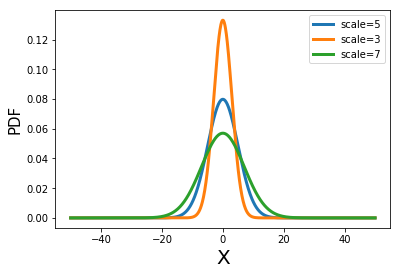

In [4]:
plt.plot(x,y1,lw=3,label='scale=5')
plt.plot(x,y2,lw=3,label='scale=3')
plt.plot(x,y3,lw=3,label='scale=7')
plt.xlabel('X',fontsize=20)
plt.ylabel('PDF',fontsize=15)
plt.legend()
plt.show()

<center>图5.7:不同规模参数下PDF的正态分布</center>

我们可以使用相同的实例也可以获得CDF。`cdf`方法在给定的输入处给出了CDF，这可以是一个标量或一个数组。CDF如图5.8所示。CDF也显示了尺度参数的影响，但是PDF提供了一个更好的内部。因此，绘制PDF来查看分布或经验数据的行为总是更好的。

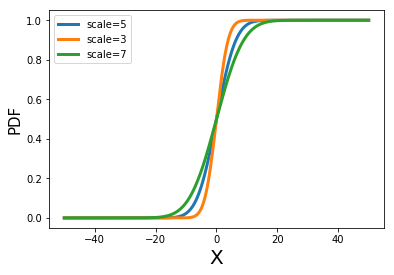

In [5]:
y1 = rv1.cdf(x)
y2 = rv2.cdf(x)
y3 = rv3.cdf(x)
# 绘制pdf
plt.clf()
plt.plot(x, y1, lw=3, label='scale=5')
plt.plot(x, y2, lw=3, label='scale=3')
plt.plot(x, y3, lw=3, label='scale=7')
plt.xlabel('X', fontsize=20)
plt.ylabel('PDF', fontsize=15) 
plt.legend()

<center>图5.8:不同规模参数下PDF的正态分布</center>

在水文学中还有其他相当常用的分布，例如柯西分布、卡方分布、指数分布和均匀分布等。让我们一起玩吧。首先，我们将生成这些分布的实例。除了位置和规模参数外，卡方分布还需要自由度参数。在均匀分布情况下，位置参数被定义为较低的范围，尺度参数定义为较高的范围，这在数学上是不正确的，而定义只是为了使函数更易于输入。图5.9显示了这些分布的PDF。

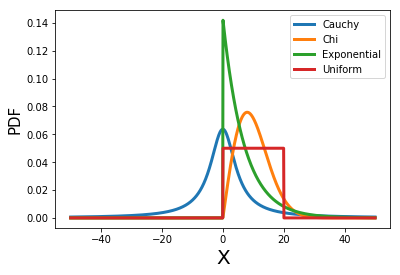

In [6]:
rv1 = st.cauchy(loc=0, scale=5)
rv2 = st.chi(2, loc=0, scale=8)
rv3 = st.expon(loc=0, scale=7)
rv4 = st.uniform(loc=0, scale=20)

# compute pdf
y1 = rv1.pdf(x)
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)
y4 = rv4.pdf(x)

# plot the pdf
plt.plot(x, y1, lw=3, label='Cauchy')
plt.plot(x, y2, lw=3, label='Chi')
plt.plot(x, y3, lw=3, label='Exponential')
plt.plot(x, y4, lw=3, label='Uniform')
plt.xlabel('X', fontsize=20)
plt.ylabel('PDF', fontsize=15)
plt.legend()
plt.show()

我们从一些分布中生成了大量的随机变量来表示分布。为了探索样本的数量对经验分布的影响，我们将从同样的分布中产生随机数，但是使用不同的样本数，来检验它是如何影响经验分布的。我们将不使用任何定量的方法检验这个，因为直到这个阶段我们都没有谈论它们，我们只是用图形来表示。首先我们将用分布中最常使用的正态分布。我们将使用`matplotlib.pyplot`库中的`hist`函数计算PDF。我们为`hist`函数指定`normed=1`，这意味着直方图的面积应该等于1，而恰好是PDF。我们也使用`plt.axis`指定图形的范围，我们保持一致，这样我们可以比较容易的比较图形。`plt.axis`的参数是$[x_{min},x_{max},y_{min},y_{max}]$。图5.10显示了样本容量为100、1000、10000和100000的经验和理论的PDF。从图中可以看出，随着样本的增加，经验分布逐渐趋近于理论值。在样本容量为100时，数据的分布得非常糟糕，然而其他的情况下则相对较好。

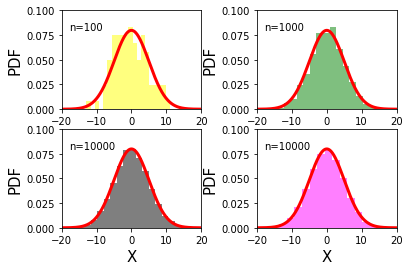

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#正态分布
rv = st.norm(loc=0,scale=5)

x1 = np.linspace(-20, 20, 1000)
y1 = rv.pdf(x1)

# compute and plot pdf
fig = plt.figure()
fig.subplots_adjust(wspace=0.4)

plt.subplot(2,2,1)
x = rv.rvs(size=100)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='yellow', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=100')

plt.subplot(2,2,2)
x = rv.rvs(size=1000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='green', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=1000')

plt.subplot(2,2,3)
x = rv.rvs(size=10000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='black', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=10000')

plt.subplot(2,2,4)
x = rv.rvs(size=100000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='magenta', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3)
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.axis([-20, 20, 0, 0.10])
plt.text(-18,0.08,'n=10000')
plt.show()

<center>图5.10:样本数(n)对经验PDF和理论PDF的影响</center>

我们也可以看到样本数量对经验分布的影响除了正态分布之外，还可以看到拉普拉斯分布。在本例中，我们分别使用`plt.xlim`和`plt.ylim`控制坐标轴的极限。在y轴情况下我们只定义`ymax`来控制坐标轴的最大极限，而对于x轴我们同时定义了两个极限。`axis`的极限可以用上一个例子中的坐标轴来确定，这个例子只是为了说明我们只能控制一个极限，而另一个极限是`plt`。图5.11显示了不同样本数的经验和理论pdf。

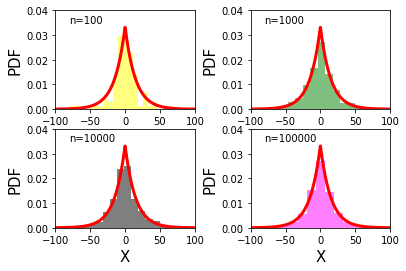

In [8]:
rv = st.laplace(loc=0, scale=15)
x1 = np.linspace(-100, 100, 1000)
y1 = rv.pdf(x1)

# compute and plot pdf
plt.clf()
fig = plt.figure()
fig.subplots_adjust(wspace=0.4)

plt.subplot(2,2,1)
x = rv.rvs(size=100)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='yellow', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=100')

plt.subplot(2,2,2)
x = rv.rvs(size=1000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='green', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=1000')

plt.subplot(2,2,3)
x = rv.rvs(size=1000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='black', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=10000')

plt.subplot(2,2,4)
x = rv.rvs(size=10000)
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='magenta', alpha=0.5)
plt.plot(x1, y1, 'r', lw=3, label='scale=5')
plt.xlabel('X', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.ylim(ymax=0.04)
plt.xlim((-100,100))
plt.text(-80,0.035,'n=100000')
plt.show()

<center>图5.11:拉普拉斯分布的样本数(n)对经验PDF和理论PDF的影响</center>